# Logistic Regression

Logistic Regression is the basis for binary classifier. In this session, we will try to understand how Logistic Regression by creating and visualizing data! Then, we will implement Logistic Regression in actual data.

As usual, we need to import the modules we will be using.

In [1]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

Let's define a method that will create random "blobs" full of (x,y) coordinates for our convenience to visualize.

In [2]:
def create_dots(x=0, y=0, n=100):
    x_cor = np.random.randn(n) + x
    y_cor = np.random.randn(n) + y
    return x_cor, y_cor

Let's create 2 blobs with 200 dots each!

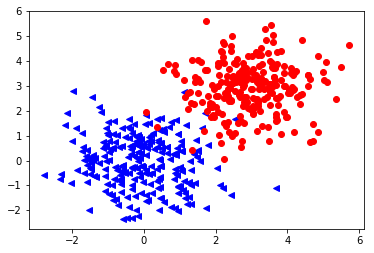

In [3]:
n = 250
x1, y1 = create_dots(n=n)
x2, y2 = create_dots(3, 3, n)
plt.plot(x1, y1, '<', color='blue')
plt.plot(x2, y2, 'o', color='red')

Upon graphing the dots, we can imagine an "invisible" line dividing the blue and red cohort. This invisible line will be our "classifier."

Now, we will combine our x and y's into (x,y) pairs. This will be our dataset X!

In [4]:
X = np.array([])
for x, y in zip(x1, y1):
    X = np.append(X, np.array([x, y]))
for x, y in zip(x2, y2):
    X = np.append(X, np.array([x, y]))
X = X.reshape(2 * n, 2)
X.round(2)

array([[-1.05,  0.64],
       [-1.71,  0.38],
       [-2.02, -0.9 ],
       [ 0.14, -0.53],
       [-0.12,  0.95],
       [ 1.04,  0.39],
       [-0.76, -1.57],
       [-0.51,  0.95],
       [ 0.89,  0.22],
       [-0.98,  0.03],
       [-0.2 , -0.29],
       [-1.15,  0.75],
       [-1.07, -0.34],
       [-0.4 , -0.51],
       [-0.63, -0.23],
       [-0.03, -0.88],
       [ 1.43, -0.92],
       [ 1.71,  1.9 ],
       [-0.47, -1.46],
       [-0.32, -0.99],
       [-0.31, -0.25],
       [-0.45,  0.15],
       [ 0.48,  1.69],
       [-2.13,  1.9 ],
       [ 0.43,  0.08],
       [ 1.15, -1.5 ],
       [ 0.49, -0.23],
       [-0.18,  0.96],
       [ 0.96,  1.07],
       [ 1.27, -0.9 ],
       [-0.27, -0.73],
       [-0.64, -1.28],
       [-0.89, -1.37],
       [ 1.78,  0.61],
       [-0.07,  0.88],
       [-0.09,  0.54],
       [-0.17,  0.62],
       [ 0.74,  0.06],
       [-0.33, -2.31],
       [ 0.88, -0.34],
       [ 0.38,  0.83],
       [-0.73, -0.38],
       [-0.35,  0.47],
       [-1.

Now, let's designate the blue class as 0 and the red class as 1, and this will be our target data (y) upon concatenating it!

In [5]:
y = np.concatenate([np.zeros((n, 1), dtype=float), np.ones((n, 1), dtype=float)])

In [6]:
from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2)

Finally, we can perform our Logistic Regression! Just like performing Linear Regression, we simply call in the class Logistic Regression from Scikit-learn's linear_model package. Then, we will fit our data X and y into the regression and train the model!

In [7]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Let's now create 1000 dots across the plane and see how well our classifier results in!

In [8]:
gn = 1000
gx = np.random.uniform(low= -3, high=5, size=(gn,))
gy = np.random.uniform(low= -3, high=5, size=(gn,))
g = np.array([])
for x, y in zip(gx, gy):
    g = np.append(g, np.array([x, y]))
g = g.reshape(gn, 2)

Using the predict method, we can predict which class each individual dot belongs to :)

In [9]:
g_pred = log_reg.predict(g)

Making class 0 as blue and class 1 as red, we can see a clear line separating our two cohorts!

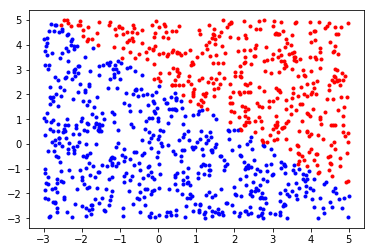

In [10]:
for i, pt in enumerate(g):
    if g_pred[i] == 0.:
        plt.plot(pt[0], pt[1], '.', color='blue')
    elif g_pred[i] == 1.:
        plt.plot(pt[0], pt[1], '.', color='red')

Although it looks nice, purely visualizing will not get us anywhere. We need a metric to help us determine how well our classifier fits. We can simply use Logistic Regression's score() method, as it returns the mean accuracy on the given test data and labels.

In [11]:
score = log_reg.score(X_test, y_test)
score

0.96

98%! That is fantastic! This means that our classifier did a really good job on classifying the 2 cohorts :)

## Real Data Application

Obviously, we don't always want to work with only our own created data, so let us try Logistic Regression on a real dataset!<br/>

The dataset we will be using is the Breast Cancer Dataset. There are two classes which we are trying to classify for: malignant (cancerous tumor) and benign (harmless tumor), given the different properties of the tumor.

Thankfully, we do not need to go on the internet to find this dataset ourselves since Scikit-Learn provides them to us! Every dataset included in the Scikit-Learn module also includes a description "DESCR" of the data. Let's understand what the dataset is about by reading the DESCR!

In [12]:
from sklearn.datasets import load_breast_cancer

bc = load_breast_cancer()
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

Now, let's take a look at the different featurese in this dataset :)

In [13]:
print("The shape of the data:", bc.data.shape)
print("The shape of the target label:", bc.target.shape)
print("The name of the features:", bc.feature_names)
print("The names of the target:", bc.target_names)

The shape of the data: (569, 30)
The shape of the target label: (569,)
The name of the features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
The names of the target: ['malignant' 'benign']


To actually see the data in an organized, tabular fashion, we should utilize the "DataFrame" class from the module: pandas.

In [14]:
import pandas as pd

df = pd.DataFrame(bc.data)
df.columns = bc.feature_names
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Let's also understand what the target means:

In [15]:
print(bc.target[45:94]) # Random start and stop
print("0 =", bc.target_names[0])
print("1 =", bc.target_names[1])

[0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1
 0 0 1 0 0 0 1 1 1 0 1 1]
0 = malignant
1 = benign


It's full of 0's and 1's! What does that mean? Malignant and Benign! In this case, 0 = Malignant and 1 = Benign!

Now, back to the normal procedures, time to split the dataset into a training set and a testing set! (Again using the train_test_split)

In [16]:
X = bc.data
y = bc.target

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Fit the training set into the Logistic Regression model:

In [18]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Evaluate the performance of our trained model by checking the accuracy:

In [19]:
score = log_reg.score(X_test, y_test)
score

0.9473684210526315

### 94.7%! That is a very decent classifier! Congratulations, you have just built a Machine Learning Model that helps doctors classify whether a tumor is cancerous or not based on only 30 properties of the tumor!